### M10 T01


### - Exercici 1

Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

- http://quotes.toscrape.com

- https://www.bolsamadrid.es

- www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)


#### Web scrapping amb BeautifulSoup

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Primer farem scrapping a la web quotes.toscrape.com

In [2]:
url = 'http://quotes.toscrape.com'

page = requests.get(url)
page

<Response [200]>

Si la resposta es [200], vol dir que el servidor ens permet recopilar dades del seu lloc web. Ara farem servir BeautifulSoup per obtenir el contingut de text de la pàgina:

In [3]:
soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="t

En aquesta sortida tenim tota la informació html sobre la pàgina però només ens interessa el contingut relatiu a les cites.

A continuació extraurem la informació de cadascun dels elements que ens interesen, com les cites, l'autor de les mateixes, i les etiquetes associades.

Primer busquem les cites contingudes a un span amb la classe text.

In [23]:
quote = soup.find_all("span", "text")
quote

[<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>,
 <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>,
 <span class="text" itemprop="text">“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”</span>,
 <span class="text" itemprop="text">“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”</span>,
 <span class="text" itemprop="text">“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”</span>,
 <span class="text" itemprop="text">“Try not to become a man of success. Rather become a man of value.”</span>,
 <span class="text" itemprop="text">“It is better to be hated for what you are than to be loved for what you are not.

Extreiem i guardem cada cita de manera que la poguem afegir al nostre dataframe.

In [36]:
column_names1 = []

for i in quote: 
    column_name = i.text
    column_names1.append(column_name)
    
print(column_names1)

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”', "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”", '“Try not to become a man of success. Rather become a man of value.”', '“It is better to be hated for what you are than to be loved for what you are not.”', "“I have not failed. I've just found 10,000 ways that won't work.”", "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”", '“A day without sunshine is like, you know, night.”']


A continuació buscarem els autors de els cites continguts a un small amb la classe author.

In [24]:
author = soup.find_all("small", "author")
author

[<small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">J.K. Rowling</small>,
 <small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">Jane Austen</small>,
 <small class="author" itemprop="author">Marilyn Monroe</small>,
 <small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">André Gide</small>,
 <small class="author" itemprop="author">Thomas A. Edison</small>,
 <small class="author" itemprop="author">Eleanor Roosevelt</small>,
 <small class="author" itemprop="author">Steve Martin</small>]

Extreiem i guardem cada autor per afegir-lo al dataframe.

In [26]:
column_names2 = []

for i in author: 
    column_name = i.text
    column_names2.append(column_name)
    
print(column_names2)

['Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Jane Austen', 'Marilyn Monroe', 'Albert Einstein', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin']


Finalment busquem tots els divs amb l'etiqueta tags on estan contingudes les paraules clau de cada cita.

In [14]:
tags = soup.find_all("div", "tags")
tags

[<div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
 <a class="tag" href="/tag/change/page/1/">change</a>
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>
 <a class="tag" href="/tag/world/page/1/">world</a>
 </div>,
 <div class="tags">
             Tags:
             <meta class="keywords" content="abilities,choices" itemprop="keywords"/>
 <a class="tag" href="/tag/abilities/page/1/">abilities</a>
 <a class="tag" href="/tag/choices/page/1/">choices</a>
 </div>,
 <div class="tags">
             Tags:
             <meta class="keywords" content="inspirational,life,live,miracle,miracles" itemprop="keywords"/>
 <a class="tag" href="/tag/inspirational/page/1/">inspirational</a>
 <a class="tag" href="/tag/life/page/1/">life</a>
 <a class="tag" href="/tag/live/page/1/">live</a>
 <a class="tag" href="/tag/miracle/page/1/">miracl

Com que aquest div conté diversos divs amb cadascuna de les etiquetes farem un for per extreure-les i afegirl-les a una llista que posteriorment afegirem al nostre dataframe.

In [76]:
column_names4 = []

for j in tags:   
    row_data = j.find_all("a", "tag")
    row = [i.text for i in row_data]
    column_names4.append(' '.join([str(elem) for elem in row]))
   


In [77]:
print(column_names4) 

['change deep-thoughts thinking world', 'abilities choices', 'inspirational life live miracle miracles', 'aliteracy books classic humor', 'be-yourself inspirational', 'adulthood success value', 'life love', 'edison failure inspirational paraphrased', 'misattributed-eleanor-roosevelt', 'humor obvious simile']


In [ ]:
Creem el dataframe

In [9]:
df = pd.DataFrame(columns=['Quote','Author', 'Tags'])

Copiem tota la informació que hem extret a les columnes corresponents.

In [27]:
df['Quote']=column_names1

In [28]:
df['Author']=column_names2

In [78]:
df['tags']=column_names4

In [ ]:
Imprimim el dataframe i veiem com total la informació extreta de la pàgina està perfectament ordenada a cada columna.

In [79]:
df.head()

,Quote,Author,tags
0,“The world as we have created it is a process ...,Albert Einstein,change deep-thoughts thinking world
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,abilities choices
2,“There are only two ways to live your life. On...,Albert Einstein,inspirational life live miracle miracles
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,aliteracy books classic humor
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,be-yourself inspirational


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Quote   10 non-null     object
 1   Author  10 non-null     object
 2   tags    10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


A continuació farem scrapping a la web de la borsa de madrid:

In [87]:
url2 = 'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000'

page2 = requests.get(url2)
page2

<Response [200]>

In [89]:
soup = BeautifulSoup(page2.text, 'lxml')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head data-analytics-id="UA-35966870-2" data-app-path="/" data-bolsa="BMadrid" data-hora-act="Mon, 28 Nov 2022 10:37:43 GMT" data-idioma="esp"><meta content="IE=11" http-equiv="X-UA-Compatible"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Copyright © BME 2022" id="ctl00_copyright" name="copyright"/><title>
	Bolsa de Madrid - Precios de la sesión
</title><link href="/esp/aspx/RSS/RSS.ashx?feed=Todo" id="ctl00_RSSLink1" rel="alternate" title="Bolsa de Madrid: Todos los contenidos agregados" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" id="ctl00_RSSLink2" rel="alternate" title="Bolsa de Madrid: Notas de Prensa" type="application/rss+xml"/><link href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" id="ctl00_RSSLink3" rel="alternate" title="Bolsa de Madrid: Reg

Obtenim l'informació html de tota la pàgina però a nosaltres només ens interessa el contingut de la taula amb els valor de les accions, així que procedirem a extreure aquesta informació.

In [90]:
table1 = soup.find('table', id= 'ctl00_Contenido_tblAcciones')
table1

<table cellpadding="3" cellspacing="0" class="TblPort" id="ctl00_Contenido_tblAcciones" width="100%">
<tr align="center">
<th scope="col">Nombre</th><th scope="col">Últ.</th><th scope="col">% Dif.</th><th scope="col">Máx.</th><th scope="col">Mín.</th><th scope="col">Volumen</th><th scope="col">Efectivo (miles €)</th><th scope="col">Fecha</th><th class="Ult" scope="col">Hora</th>
</tr><tr align="right">
<td align="left" class="DifFlBj"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0125220311">ACCIONA</a></td><td>186,6000</td><td class="DifClBj">-0,53</td><td>187,8000</td><td>186,0000</td><td>4.792</td><td>895,94</td><td align="center">28/11/2022</td><td align="center" class="Ult">10:20:42</td>
</tr><tr align="right">
<td align="left" class="DifFlBj"><a href="/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0105563003">ACCIONA ENER</a></td><td>37,7400</td><td class="DifClBj">-0,11</td><td>37,9600</td><td>37,3800</td><td>18.419</td><td>695,51</td><td align="center">28/11/2022</td><td align=

Extreiem la informació del th, que és on estan continguts els noms de les diferents columnes.

In [91]:
column_names = []

for i in table1.find_all('th'): 
    column_name = i.text
    column_names.append(column_name)
    
print(column_names)

['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen', 'Efectivo (miles €)', 'Fecha', 'Hora']


Creem un nou dataframe amb el nom de les columes corresponents a la taula.

In [92]:
stock_prices = pd.DataFrame(columns=column_names)
stock_prices

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora


Ara extreurem ens valors de cadascuna de les columnes contingudes als td, que estan anidats dintre d'un tr.

In [93]:
for j in table1.find_all('tr')[1:]:   # tr -> rows (begins in second row, firts is our columns names)
    row_data = j.find_all('td')       # td -> items in each row 
    row = [i.text for i in row_data]
    length = len(stock_prices)
    #  we fill in each row according to its index 
    stock_prices.loc[length] = row  

In [94]:
stock_prices

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"186,6000","-0,53","187,8000","186,0000",4.792,"895,94",28/11/2022,10:20:42
1,ACCIONA ENER,"37,7400","-0,11","37,9600","37,3800",18.419,"695,51",28/11/2022,10:22:01
2,ACERINOX,"9,2520","-0,77","9,2660","9,1440",191.667,"1.763,33",28/11/2022,10:21:30
3,ACS,"26,6300","0,19","26,6800","26,4500",98.031,"2.603,85",28/11/2022,10:21:46
4,AENA,"123,4500","-0,52","123,8500","122,0500",15.566,"1.918,20",28/11/2022,10:21:37
5,AMADEUS,"51,6400","-0,27","51,9800","51,4400",33.658,"1.741,28",28/11/2022,10:21:46
6,ARCELORMIT.,"25,3500","-0,71","25,3750","25,0400",92.093,"2.323,00",28/11/2022,10:22:30
7,B.SANTANDER,"2,8435","0,35","2,8465","2,8020",5.334.021,"15.041,79",28/11/2022,10:22:25
8,BA.SABADELL,"0,8820","0,64","0,8830","0,8674",3.874.135,"3.388,03",28/11/2022,10:22:25
9,BANKINTER,"6,3240","0,09","6,3260","6,2500",341.009,"2.140,84",28/11/2022,10:22:28


In [95]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre              35 non-null     object
 1   Últ.                35 non-null     object
 2   % Dif.              35 non-null     object
 3   Máx.                35 non-null     object
 4   Mín.                35 non-null     object
 5   Volumen             35 non-null     object
 6   Efectivo (miles €)  35 non-null     object
 7   Fecha               35 non-null     object
 8   Hora                35 non-null     object
dtypes: object(9)
memory usage: 2.7+ KB


Veiem que totes les columnes son objectes, i com que varies d'elles contenen números que podem voler fer servir, les canviarem perquè siguin del tipus float.

El format dels números és diferent del que utilitza Python, ja que utilitza punts per marcar les mil·lèsimes i comes per marcar els decimals. Per solucionar-ho primer eliminarem els punts i després substituirem les comes per punts per marcar els decimals.

In [96]:
stock_prices.replace('\.','', regex=True,inplace=True)
stock_prices.replace('\,','.', regex=True,inplace=True)

In [97]:
stock_prices.head()

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,186.6000,-0.53,187.8000,186.0000,4792,895.94,28/11/2022,10:20:42
1,ACCIONA ENER,37.7400,-0.11,37.9600,37.3800,18419,695.51,28/11/2022,10:22:01
2,ACERINOX,9.2520,-0.77,9.2660,9.1440,191667,1763.33,28/11/2022,10:21:30
3,ACS,26.6300,0.19,26.6800,26.4500,98031,2603.85,28/11/2022,10:21:46
4,AENA,123.4500,-0.52,123.8500,122.0500,15566,1918.20,28/11/2022,10:21:37


In [99]:
stock_prices.columns

Index(['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen',
       'Efectivo (miles €)', 'Fecha', 'Hora'],
      dtype='object')

In [100]:
num_cols = ['Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen',
       'Efectivo (miles €)']

stock_prices[num_cols] = stock_prices[num_cols].astype('float')

In [101]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              35 non-null     object 
 1   Últ.                35 non-null     float64
 2   % Dif.              35 non-null     float64
 3   Máx.                35 non-null     float64
 4   Mín.                35 non-null     float64
 5   Volumen             35 non-null     float64
 6   Efectivo (miles €)  35 non-null     float64
 7   Fecha               35 non-null     object 
 8   Hora                35 non-null     object 
dtypes: float64(6), object(3)
memory usage: 2.7+ KB


#### Web scrapping amb Selenium

In [107]:
from selenium import webdriver
from selenium.webdriver.common.by import By

We will use Selenium library to scrap another table from the same page, this time we will scrap 'Resumen de Índices' table: 

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('user-agent = Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36')
driver = webdriver.Chrome(chrome_options=options, executable_path=r'D:\users\ciberIntegra_13\Chrome\Application\chrome.exe')

In [110]:
url = 'https://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'

driver.get(url)

WebDriverException: Message: Can not connect to the Service C:\Program Files (x86)\Google\Chrome\Application\chrome.exe


When inspecting the table we see which is the id of the table : 'ctl00_Contenido_tblÍndices'. We will use it to iterate with a for loop for each row (tag tr) and taking the elements tag td and tag th of each row. 

We search for the elements using XPATH. 

In [18]:
rows = []
for table in driver.find_elements(by= By.XPATH, value = '//*[contains(@id,"ctl00_Contenido_tblÍndices")]//tr'):
        data = [item.text for item in table.find_elements(by= By.XPATH, value= ".//*[self::td or self::th]")]
        # append data by rows 
        rows.append(data)
        
# 1st row is column names 
stock_indices = pd.DataFrame(rows[1:], columns = rows[0])
stock_indices

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif.\nAño 2022
0,IBEX 35®,"8.933,60","8.930,80","-0,03","8.992,70","8.905,60",30/05/2022,17:38:00,"2,49"
1,IBEX 35® con Dividendos,"27.983,60","27.974,90","-0,03","28.168,70","27.896,10",30/05/2022,17:38:00,"4,08"
2,IBEX MEDIUM CAP®,"13.341,00","13.400,50","0,45","13.448,10","13.367,50",30/05/2022,17:38:00,"-3,00"
3,IBEX SMALL CAP®,"8.840,40","8.870,80","0,34","8.903,50","8.848,20",30/05/2022,17:38:01,"7,63"
4,IBEX 35® Bancos,"508,50","515,70","1,42","515,70","510,00",30/05/2022,17:38:01,"11,38"
...,...,...,...,...,...,...,...,...,...
80,Índice ITX Inverso X3,"265,10","257,60","-2,83","261,80","251,50",30/05/2022,17:38:00,"32,78"
81,Índice TEF Inverso X5,"1.813,40","1.797,90","-0,85","1.920,70","1.761,20",30/05/2022,17:38:01,"-81,23"
82,Índice SAN Inverso X5,"981,10","917,30","-6,50","975,40","917,30",30/05/2022,17:38:01,"-76,62"
83,Índice BBVA Inverso X5,"2.351,60","2.098,50","-10,76","2.299,10","2.098,50",30/05/2022,17:38:00,"-70,21"


In [19]:
# we can close the driver now 
driver.quit()

We will change the data types of the dataframe, since by default all columns are strings: 

In [20]:
stock_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nombre           85 non-null     object
 1   Anterior         85 non-null     object
 2   Último           85 non-null     object
 3   % Dif.           85 non-null     object
 4   Máximo           85 non-null     object
 5   Mínimo           85 non-null     object
 6   Fecha            85 non-null     object
 7   Hora             85 non-null     object
 8   % Dif.
Año 2022  85 non-null     object
dtypes: object(9)
memory usage: 6.1+ KB


We notice something strange in last column, pandas does not return its data type, maybe it is because the column name has an 'ñ', we will rename the column: 

In [21]:
stock_indices.rename(columns= {'% Dif.\nAño 2022': '% Dif 2022'}, inplace= True)

In [22]:
stock_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nombre      85 non-null     object
 1   Anterior    85 non-null     object
 2   Último      85 non-null     object
 3   % Dif.      85 non-null     object
 4   Máximo      85 non-null     object
 5   Mínimo      85 non-null     object
 6   Fecha       85 non-null     object
 7   Hora        85 non-null     object
 8   % Dif 2022  85 non-null     object
dtypes: object(9)
memory usage: 6.1+ KB


In [23]:
stock_indices.columns

Index(['Nombre', 'Anterior', 'Último', '% Dif.', 'Máximo', 'Mínimo', 'Fecha',
       'Hora', '% Dif 2022'],
      dtype='object')

In [24]:
# columns we want to convert to floats 
numeric_cols2 = ['Anterior', 'Último', '% Dif.', 'Máximo', 'Mínimo', '% Dif 2022']


We will use the method replace as we did above to change the format: 

In [25]:
stock_indices.replace('\.','', regex=True,inplace=True)
stock_indices.replace('\,','.', regex=True,inplace=True)

In [29]:
# we have one row (25th) with missimg values marked as '-'
#we change '-' char to np.nan to avoid error when changing data type to float  
stock_indices[25:26].replace('-', np.nan, inplace = True)

In [30]:
pd.set_option('display.max_rows', 100)
stock_indices

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif 2022
0,IBEX 35®,8933.60,8930.80,-0.03,8992.70,8905.60,30/05/2022,17:38:00,2.49
1,IBEX 35® con Dividendos,27983.60,27974.90,-0.03,28168.70,27896.10,30/05/2022,17:38:00,4.08
2,IBEX MEDIUM CAP®,13341.00,13400.50,0.45,13448.10,13367.50,30/05/2022,17:38:00,-3.00
3,IBEX SMALL CAP®,8840.40,8870.80,0.34,8903.50,8848.20,30/05/2022,17:38:01,7.63
4,IBEX 35® Bancos,508.50,515.70,1.42,515.70,510.00,30/05/2022,17:38:01,11.38
5,IBEX 35® Energía,1538.00,1518.40,-1.27,1542.70,1513.20,30/05/2022,17:38:01,12.51
6,IBEX 35® Construcción,1625.20,1616.60,-0.53,1639.60,1612.70,30/05/2022,17:38:01,1.28
7,IBEX Gender Equality,9099.00,9140.30,0.45,9165.30,9120.80,30/05/2022,17:38:00,4.94
8,IBEX Gender Equality Total Return,10224.50,10270.90,0.45,10299.00,10249.00,30/05/2022,17:38:00,6.06
9,IBEX Gender Equality Net Return,10005.30,10050.70,0.45,10078.20,10029.30,30/05/2022,17:38:00,5.85


In [31]:
stock_indices[numeric_cols2] = stock_indices[numeric_cols2].astype('float')

In [32]:
stock_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nombre      85 non-null     object 
 1   Anterior    85 non-null     float64
 2   Último      85 non-null     float64
 3   % Dif.      84 non-null     float64
 4   Máximo      85 non-null     float64
 5   Mínimo      85 non-null     float64
 6   Fecha       85 non-null     object 
 7   Hora        85 non-null     object 
 8   % Dif 2022  84 non-null     float64
dtypes: float64(6), object(3)
memory usage: 6.1+ KB


In [33]:
stock_indices.head()

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif 2022
0,IBEX 35®,8933.6,8930.8,-0.03,8992.7,8905.6,30/05/2022,17:38:00,2.49
1,IBEX 35® con Dividendos,27983.6,27974.9,-0.03,28168.7,27896.1,30/05/2022,17:38:00,4.08
2,IBEX MEDIUM CAP®,13341.0,13400.5,0.45,13448.1,13367.5,30/05/2022,17:38:00,-3.00
3,IBEX SMALL CAP®,8840.4,8870.8,0.34,8903.5,8848.2,30/05/2022,17:38:01,7.63
4,IBEX 35® Bancos,508.5,515.7,1.42,515.7,510.0,30/05/2022,17:38:01,11.38


In [36]:
# save dataframe to csv format 
stock_indices.to_csv('stock_indices_df.csv', index = False)

### Nivell 2

### - Exercici 2

Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.



We have generated 2 files: stock_prices and stock_indices.

#### Stock Prices file report

We are going gto generate a Profile Report to attach to the word file using pandas_profiling library. 

In [37]:
# open stock_prices df: 
stock = pd.read_csv('Stock_prices_df.csv')
stock.head()

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,179.900,-2.49,186.60,178.90,97941.0,17707.70,30/05/2022,Cierre
1,ACERINOX,11.945,-0.46,12.03,11.65,2482184.0,29542.92,30/05/2022,Cierre
2,ACS,26.690,0.34,26.86,26.55,468202.0,12486.01,30/05/2022,Cierre
3,AENA,141.900,-0.60,144.80,141.65,107022.0,15309.94,30/05/2022,Cierre
4,ALMIRALL,10.550,0.76,10.64,10.47,225914.0,2380.74,30/05/2022,Cierre


In [38]:
stock.columns

Index(['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen',
       'Efectivo (miles €)', 'Fecha', 'Hora'],
      dtype='object')

**Information about the dataset** : This dataset is composed of information on the share prices of companies belonging to the IBEX 35 on 30/05/2022. 

**Information about each column:**

+ Nombre: Name of the Company. 
+ Últ.: Current share price (in €). 
+ % Dif: Percentage difference with respect to the opening price.
+ Máx. : Maximum value of the price in the current session. 
+ Mín. : Minimum value of the price in the current session. 
+ Volumen : Number of transactions of the asset carried out until the close of the trading session. 
+ Efectivo (miles €) : Transactions carried out up to the close of the trading session, expressed in thousands of euros. 
+ Fecha : Date of the session. 
+ Hora : Time of of the day. If 'Cierre' means the session is closed. 

In [42]:
from pandas_profiling import ProfileReport

# generate profile report 
stock_profile = ProfileReport(stock, title = 'IBEX 35 Stock Exchange. Session prices (30/05/2022)', 
     dataset= {'description': 'This dataset is composed of information on the share prices of companies belonging to the IBEX 35 on 30/05/2022.', 
              'url': 'https://www.bolsamadrid.es/esp/aspx/Portada/Portada.aspx'}, 
     variables = {'descriptions': {
         'Nombre' : 'Name of the Company', 
         'Últ.' : 'Current share price (in €)', 
         '% Dif.': 'Percentage difference with respect to the opening price', 
         'Máx.' : 'Maximum value of the price in the current session', 
         'Mín.': 'Minimum value of the price in the current session', 
         'Volumen': 'Number of transactions of the asset carried out until the close of the trading session', 
         'Efectivo (miles €)': 'Transactions carried out up to the close of the trading session, expressed in thousands of euros', 
         'Fecha' : 'Date of the session', 
         'Hora': 'Time of of day. If "Cierre" means the session is closed.'
         
     } })

stock_profile.to_file('IBEX35_Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

This generates a report in HTML format, the **description of the variables is available by clicking on the 'Variables' tab** in the 'Overview' section, and the description of the dataset is inside the 'Dataset' tab. 

A preview of the Report generated: 

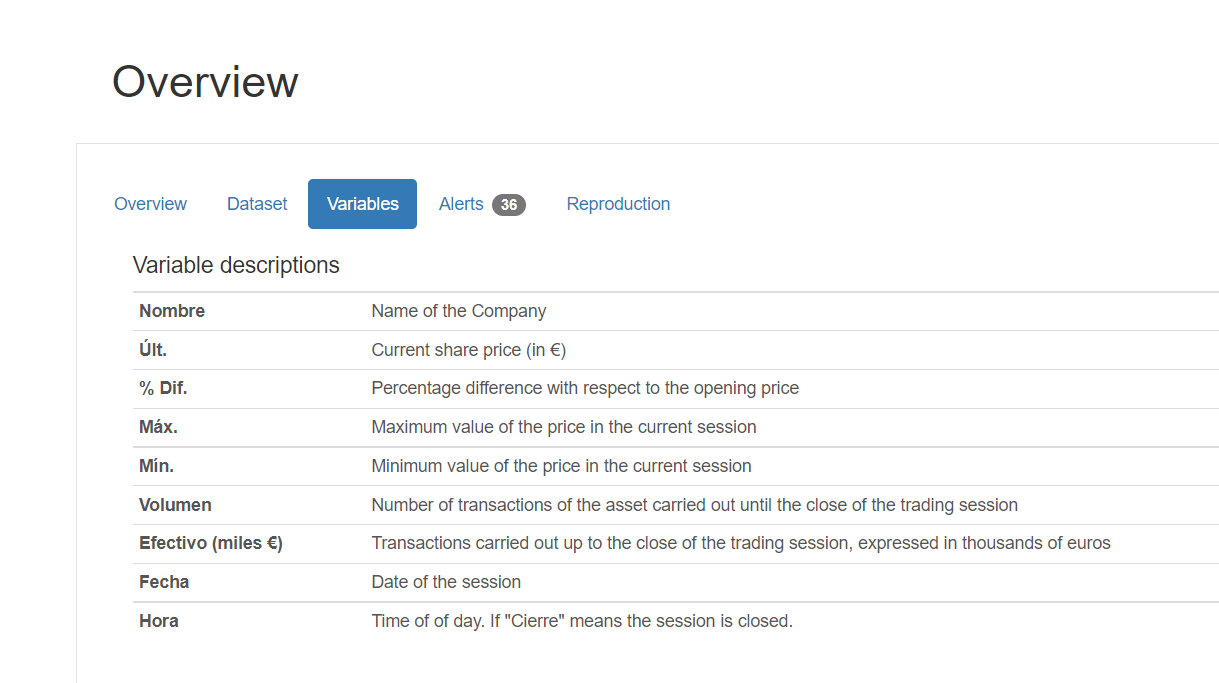

This HTML report can be opened from the following link: 


https://elenaml81.github.io/Web_Scrapping/IBEX35_Report.html

#### Stock indices file report

We will use the same library as before to do a report of our stock indices table that we have generated with Selenium. 

In [2]:
# open csv
stock_indices = pd.read_csv('stock_indices_df.csv')
stock_indices.head()

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif 2022
0,IBEX 35®,8933.6,8930.8,-0.03,8992.7,8905.6,30/05/2022,17:38:00,2.49
1,IBEX 35® con Dividendos,27983.6,27974.9,-0.03,28168.7,27896.1,30/05/2022,17:38:00,4.08
2,IBEX MEDIUM CAP®,13341.0,13400.5,0.45,13448.1,13367.5,30/05/2022,17:38:00,-3.00
3,IBEX SMALL CAP®,8840.4,8870.8,0.34,8903.5,8848.2,30/05/2022,17:38:01,7.63
4,IBEX 35® Bancos,508.5,515.7,1.42,515.7,510.0,30/05/2022,17:38:01,11.38


In [4]:
stock_indices.columns

Index(['Nombre', 'Anterior', 'Último', '% Dif.', 'Máximo', 'Mínimo', 'Fecha',
       'Hora', '% Dif 2022'],
      dtype='object')

**Information about the dataset:** This dataset contains information on the different indexes of the different stock markets that constitute the Spanish stock market. 

**Information about each column:**

+ **Nombre** : name of the stock index
+ **Anterior** : closing volume in the previous day's session
+ **Último** : index volume at the time of table creation
+ **% Dif.**: precentual difference of the current volume with respect to the column 'Anterior'
+ **Máximo** : maximum value of the stock market in the current session 
+ **Mínimo** : minimum value of the stock market in the current session 
+ **Fecha** : Date of the session
+ **% Dif 2022** : difference with respect to the year 2022 


In [6]:
from pandas_profiling import ProfileReport

# generate profile report 
indices_profile = ProfileReport(stock_indices, 
                  title = 'Information on the volume of the different indexes of the Spanish stock market (05/30/2022)', 
                  dataset = {'description' : 'This dataset contains information on the different indexes of the different stock markets that constitute the Spanish stock market.', 
                            'url': 'https://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'}, 
                  variables = {'descriptions': {
                      'Nombre' : 'name of the stock index', 
                      'Anterior' : 'closing volume in the previous day session', 
                      'Último' : 'index volume at the time of table creation', 
                      '% Dif.' : 'precentual difference of the current volume with respect to the column "Anterior"', 
                      'Máximo' : 'maximum value of the stock market in the current session', 
                      'Mínimo' : 'minimum value of the stock market in the current session', 
                      'Fecha' : 'Date of the session', 
                      '% Dif 2022' : 'difference  with respect to the year 2022'
                  }})
#generate html 
indices_profile.to_file('Stock Indices Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

As before, we have generated an html file, is posted in the following link: 

https://elenaml81.github.io/Web_Scrapping/Stock_Indices_Report.html

### Nivell 3

### - Exercici 3

Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 



I want to buy a new acoustic guitar, so I will do web scraping of a web page to consult brand, model, price and characteristics of all the acoustic guitars between 1000 and 2500 €. The site is a well known store that sells musical instruments online: https://www.thomann.de/es/index.html

This is a screenshot of the page that we are going to scrap: 

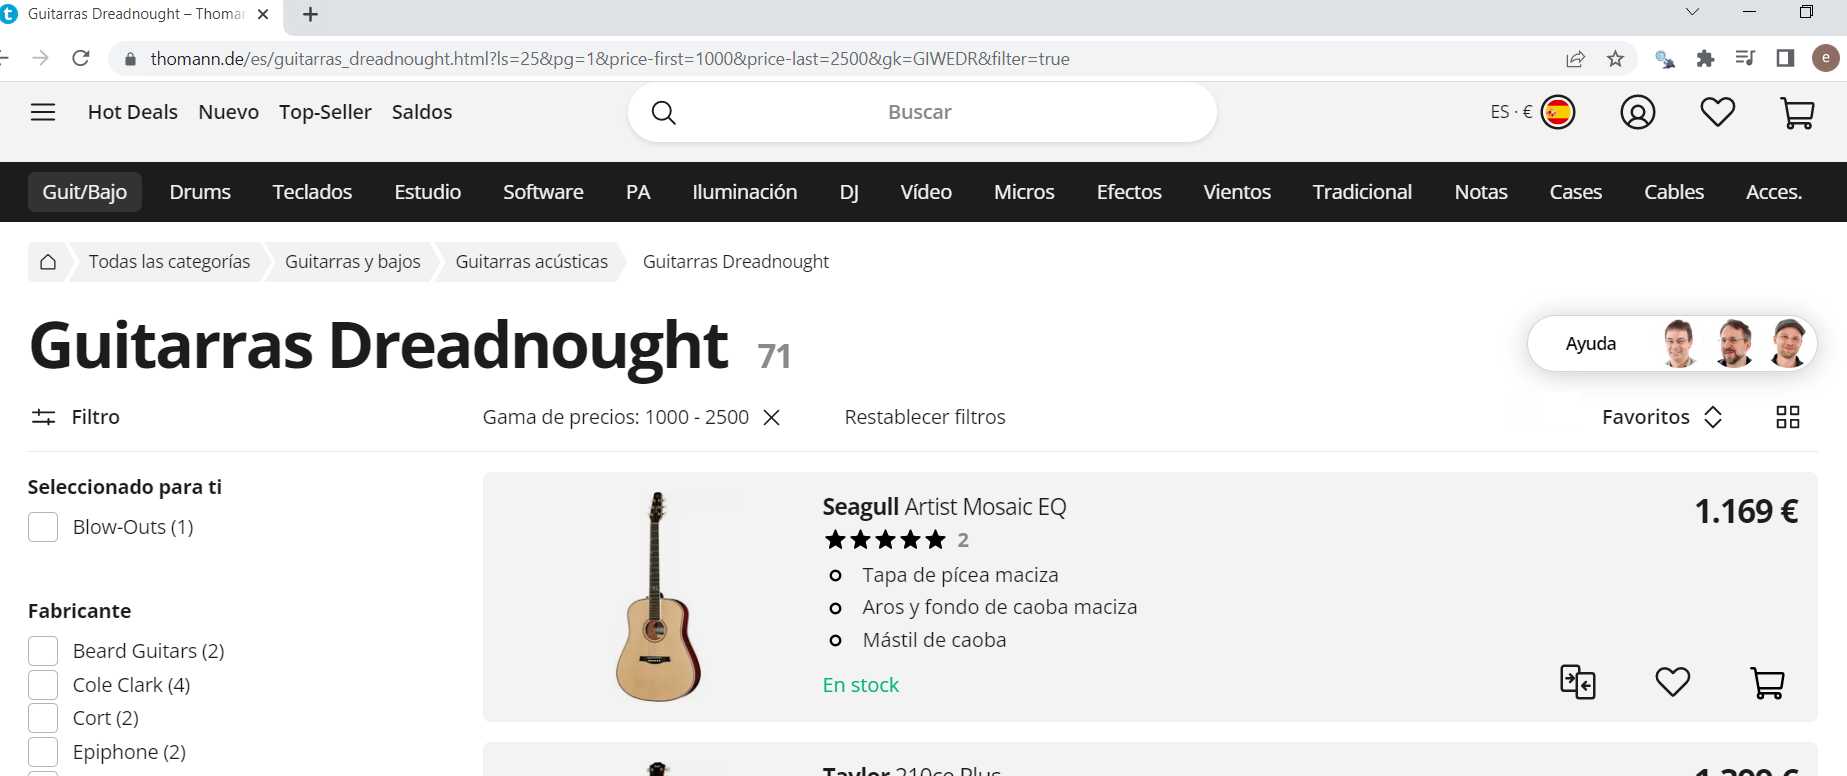

Now we use the code to extract the information using Scrapy. We will locate the elements of the page using the CSS path: 

In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess

In [2]:
import json

# define class to save results as json file 
class JsonWriterPipeline(object):

    def open_spider(self, spider):
        self.file = open('guitar_result.jl', 'w')

    def close_spider(self, spider):
        self.file.close()

    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item
    
    
import logging


# construct the spider to get the info we want 
class GuitarSpider(scrapy.Spider):
    name = "guitars"
    start_urls = [
        'https://www.thomann.de/es/guitarras_dreadnought.html?ls=25&pg=1&price-first=1000&price-last=2500&gk=GIWEDR&filter=true',
        'https://www.thomann.de/es/guitarras_dreadnought.html?ls=25&pg=2&price-first=1000&price-last=2500&gk=GIWEDR&filter=true',
        'https://www.thomann.de/es/guitarras_dreadnought.html?ls=25&pg=3&price-first=1000&price-last=2500&gk=GIWEDR&filter=true'
    ]
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1}, # Used for pipeline 1
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'guitar_result.json'                       # Used for pipeline 2
    }
    
    def parse(self, response):
        for guitar in response.css('div.fx-product-list-entry'):
            yield {
                'Brand': guitar.css('span.title__manufacturer::text').extract_first(),
                'Model': guitar.css('span.title__name::text').extract_first(),
                'Price': guitar.css('span.fx-typography-price-primary.fx-price-group__primary.product__price-primary::text').extract_first(),
                'Description_1': guitar.css('li.fx-list__item--circle:nth-child(1)::text').extract_first(), 
                'Description_2': guitar.css('li.fx-list__item--circle:nth-child(2)::text').extract_first(), 
                'Description_3': guitar.css('li.fx-list__item--circle:nth-child(3)::text').extract_first(), 
            }

process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36'
})

process.crawl(GuitarSpider)
process.start()

2022-06-03 22:03:41 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2022-06-03 22:03:41 [scrapy.utils.log] INFO: Versions: lxml 4.7.1.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.4.0, Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 21.0.0 (OpenSSL 1.1.1o  3 May 2022), cryptography 3.4.8, Platform Windows-10-10.0.19044-SP0
2022-06-03 22:03:41 [scrapy.crawler] INFO: Overridden settings:
{'LOG_LEVEL': 30,
 'USER_AGENT': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
               '(KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36'}
2022-06-03 22:03:41 [py.warnings] WARNING: C:\Users\eelee\anaconda3\lib\site-packages\scrapy\extensions\feedexport.py:289: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)



In [3]:
import pandas as pd
# we can open the json file to a dataframe 
guitars_df = pd.read_json('guitar_result.jl', lines=True)
guitars_df.head()

,Brand,Model,Price,Description_1,Description_2,Description_3
0,Gibson,Hummingbird Studio Walnut AN,1.939 €\n,Fabricada en Estados Unidos,Hombros cuadrados,Tapa de pícea de Sitka maciza
1,Gibson,J-45 Standard VS LH,2.390 €\n,Para zurdos,Estilo de hombros redondeados,Tapa de pícea maciza
2,Cort,Flow OC Natural Satin,1.144 €\n,Cuerpo Orchestra con cutaway,Tapa de cedro rojo macizo,Aros y fondo de caoba maciza
3,Maton,SRS60C w/ Case,1.869 €\n,Dreadnought,Con cutaway veneciano,Tapa de pícea de Sitka maciza
4,LAG,THV20DCE Tramontane Hy B-Stock,1.059 €\n,Con cutaway,Tapa de pícea de Engelman maciza,Aros y fondo de ovangkol


In [4]:
# inspect the df 
guitars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          71 non-null     object
 1   Model          71 non-null     object
 2   Price          71 non-null     object
 3   Description_1  71 non-null     object
 4   Description_2  71 non-null     object
 5   Description_3  71 non-null     object
dtypes: object(6)
memory usage: 3.5+ KB


From our 'Price' column, we will extract the price info and convert it to int (all prices are integer numbers, there is not any float number): 

In [5]:
guitars_df['Price'] = guitars_df['Price'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [6]:
guitars_df.head()

,Brand,Model,Price,Description_1,Description_2,Description_3
0,Gibson,Hummingbird Studio Walnut AN,1939,Fabricada en Estados Unidos,Hombros cuadrados,Tapa de pícea de Sitka maciza
1,Gibson,J-45 Standard VS LH,2390,Para zurdos,Estilo de hombros redondeados,Tapa de pícea maciza
2,Cort,Flow OC Natural Satin,1144,Cuerpo Orchestra con cutaway,Tapa de cedro rojo macizo,Aros y fondo de caoba maciza
3,Maton,SRS60C w/ Case,1869,Dreadnought,Con cutaway veneciano,Tapa de pícea de Sitka maciza
4,LAG,THV20DCE Tramontane Hy B-Stock,1059,Con cutaway,Tapa de pícea de Engelman maciza,Aros y fondo de ovangkol


In [7]:
guitars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          71 non-null     object
 1   Model          71 non-null     object
 2   Price          71 non-null     int32 
 3   Description_1  71 non-null     object
 4   Description_2  71 non-null     object
 5   Description_3  71 non-null     object
dtypes: int32(1), object(5)
memory usage: 3.2+ KB


Now we have our info in the correct format. We check that we have 71 guitars, the same result we see in the screenshot we have made of the page.